# 食事スコアの予測
約 60 名の食事に関するデータが 1,300 件ほどあり、その食事の内容に対して資格を持った管理栄養士が 4 段階のスコア

* 1: 悪い
* 2: どちらかというと悪い
* 3: どちらかというと良い
* 4: 良い

を付与しています。このデータを用いて、与えられた食事データに対してその食事スコアを予測する分類器を構築し、その性能を評価してください。

# データの詳細

## 特徴量

データのレコードは以下のような特徴量から構成されています。また最後の `score` が本タスクにおける目的変数です。

特徴量名 | データ型 | 説明  
--- | --- | ---
type| カテゴリ値 (breakfast/lunch/dinner) | 食事の種類
gender| カテゴリ値 (female/male)| 食事を取った人の性別
age| 整数| 食事を取った人の年齢
height| 整数、単位は cm| 食事を取った人の身長
weight| 整数、単位は kg| 食事を取った人の体重
EER|整数、単位は kcal|食事を取った人が一日あたりに採取すべきエネルギー量(推定エネルギー必要量)
P target (15%)|整数、単位はグラム|食事を取った人が一日あたりに採取すべきタンパク質量
F target (25%)|整数、単位はグラム|食事を取った人が一日あたりに採取すべき脂質量
C target (60%)|整数、単位はグラム|食事を取った人が一日あたりに採取すべき炭水化物量
dishes|整数|食事に含まれる品目数
E|浮動小数点数、単位は kcal|食事に含まれるエネルギー量
P|浮動小数点数、単位はグラム|食事に含まれるタンパク質量
F|浮動小数点数、単位はグラム|食事に含まれる脂質量
C|浮動小数点数、単位はグラム|食事に含まれる炭水化物量
salt|浮動小数点数、単位はグラム|食事に含まれる塩分量
vegetable|浮動小数点数、単位はグラム|食事に含まれる野菜量
score|カテゴリ値 (1:worst, 2:bad, 3:good, 4:best)|管理栄養士によって付与されたスコア

## ドメイン知識

* EER (推定エネルギー必要量) 
  * 基礎代謝量と一日の活動量から計算されるエネルギー量で、その人が一日あたり摂取することが推奨されるエネルギー量です。基礎代謝量は、性別、年齢、身長、体重といった数字から導出される数値で、各種の計算方法がありますが、ここでは国立健康･栄養研究所の式（Ganpule et al., 2007) に従っています
* P target (15%), F target (25%), C target(60%)
  * 上述の EER を満たすために、タンパク質・脂質・炭水化物をどの程度とるのが良いかの目安です。タンパク質と炭水化物は 1g あたり 4kcal、脂質は 1g あたり 9kcal で換算しています
*  salt
  * 男性は一日あたり 8g 以下、女性は 7g 以下が推奨されています
* vegetable
  * 一日あたり 350g の摂取が推奨されています






#1.特徴量の可視化

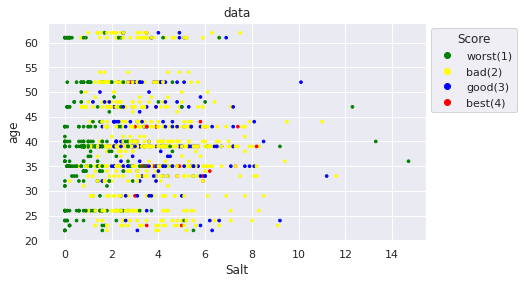

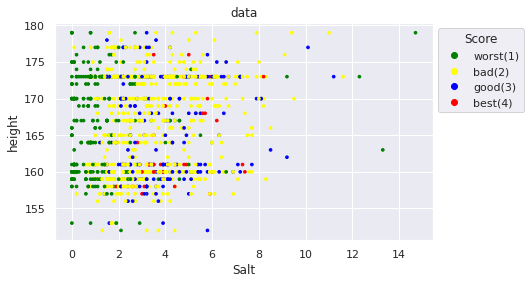

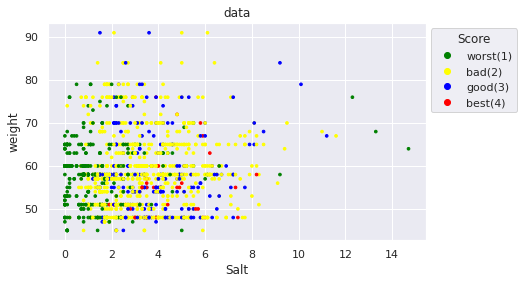

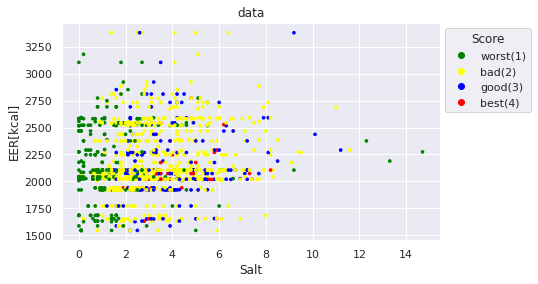

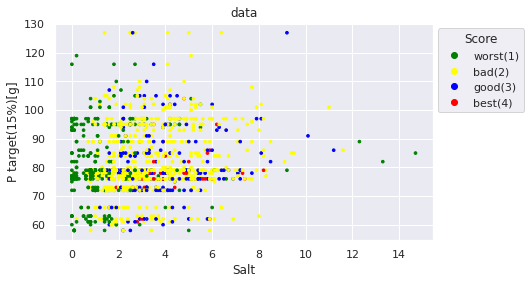

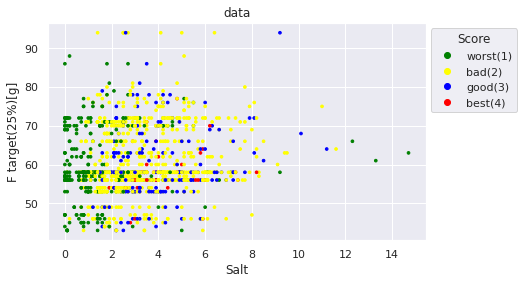

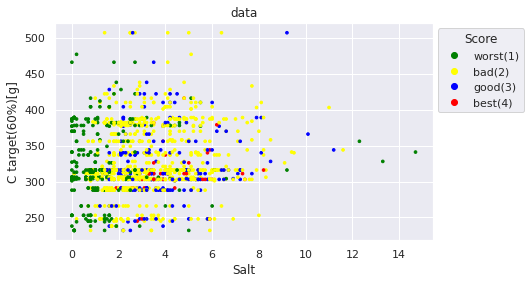

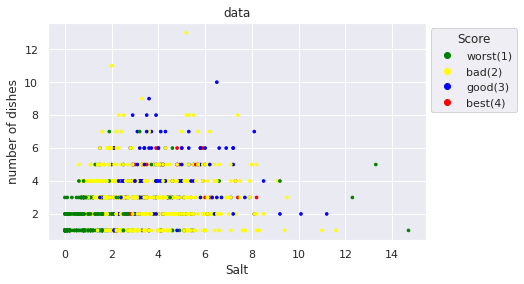

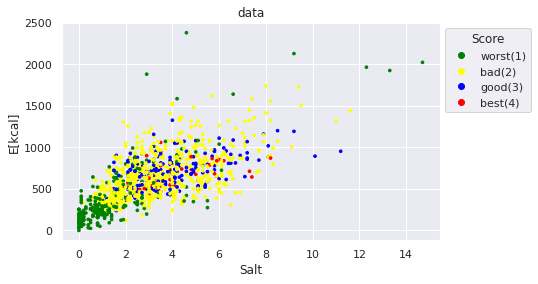

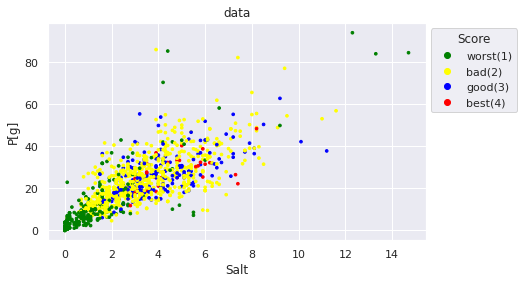

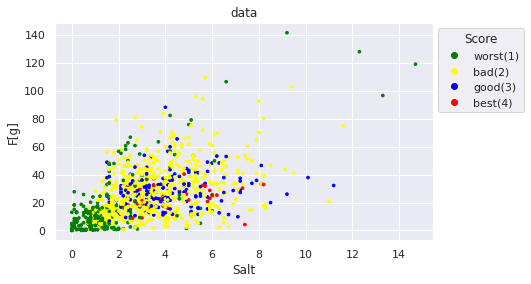

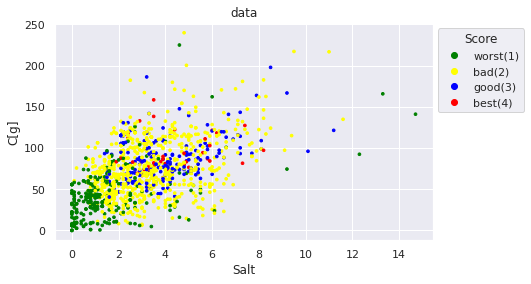

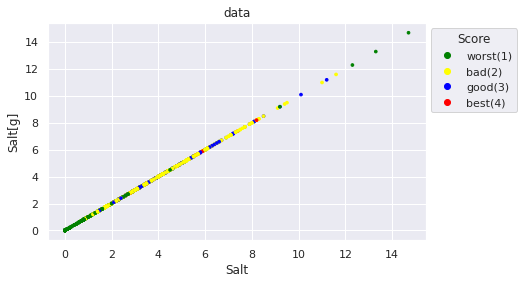

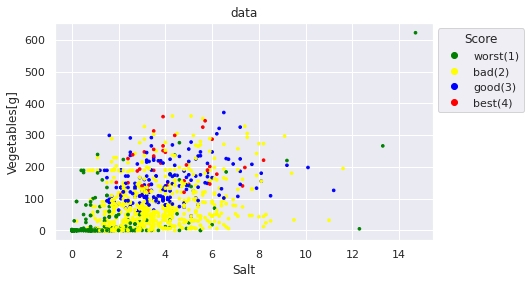

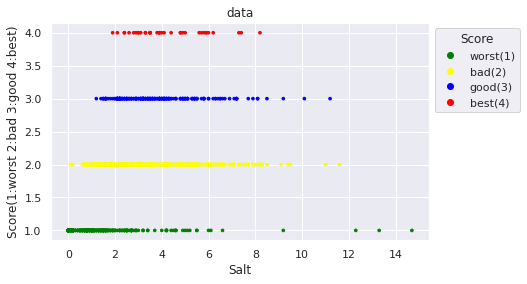

In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open_by_key('個人のスプレッドシートのキー番号').sheet1
import pandas as pd

rows = worksheet.get_all_values()
header = rows.pop(0)
df = pd.DataFrame.from_records(rows, columns=header)#indexの''は自由に変更

# 空文字を None に変換しておく
df = df.where(df != '')
df = df.drop(['','Type','gender'],axis=1)
colors = {1:'green', 2:'yellow', 3:'blue', 4:'red'}

for column in df.columns:    
    fig, ax = plt.subplots(1,1)
    plt.subplots_adjust(right=1)
    
    #可視化(xを自由に変更)
    g1 = plt.scatter(x=df['Salt[g]'].astype(float),y = df[column].astype(float),c=df['Score(1:worst 2:bad 3:good 4:best)'].astype(int).map(colors),s=7)

    legend = [plt.plot([], [], marker='o', ls='', color=colors[i], label=l)[0] for i, l in enumerate(['worst(1)', 'bad(2)', 'good(3)', 'best(4)'], start=1)]
    plt.legend(handles=legend, title='Score', loc='upper left', bbox_to_anchor=(1,1))
    
    plt.title("data")
    plt.xlabel('Salt')
    plt.ylabel(column)
   
fig.show()

#1-1
##スコアごとの平均値の可視化(男女別)

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


ValueError: ignored

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


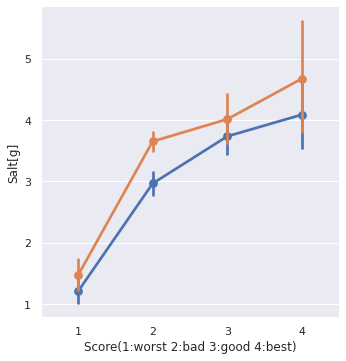

In [ ]:
# Google Spreadsheet からのデータの読み込み
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=k9q0pp33dckN

from google.colab import auth
from google.auth import default
import gspread
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open_by_key('個人のスプレッドシートのキー番号').sheet1
import pandas as pd

rows = worksheet.get_all_values()
header = rows.pop(0)
df = pd.DataFrame.from_records(rows, columns=header)#indexの''は自由に変更

# 空文字を None に変換しておく
df = df.where(df != '')
df = df.fillna(0)

sns.set(font='IPAexGothic')

df.loc[df["gender"] == "female","gender"] = 0 #青
df.loc[df["gender"] == "male","gender"] = 1 #オレンジ
df = df.drop(['','Type'],axis=1)

#yを自由に変更
sns.catplot(data=df,kind='point', x=df["Score(1:worst 2:bad 3:good 4:best)"].astype(int), y=df["Salt[g]"].astype(float),hue = df["gender"].astype(int))#区切りたい時に使用

plt.tight_layout()
plt.show()


#可視化で分かったこと
###・塩分(男性>女性)
###・E,C,F,P(男性>女性)
###・EER,C-target,F-target,P-target(男性>女性)
###・皿(男性<女性)

#1-2
##スコアごとの平均値の可視化(朝食、昼食、夕食別)

ValueError: ignored

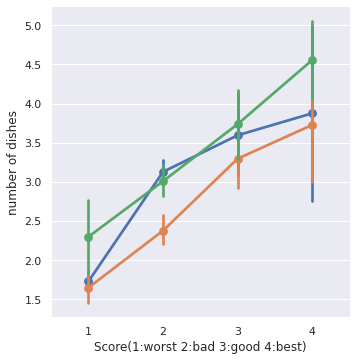

In [ ]:
# Google Spreadsheet からのデータの読み込み
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=k9q0pp33dckN

from google.colab import auth
from google.auth import default
import gspread
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open_by_key('個人のスプレッドシートのキー番号').sheet1
import pandas as pd

rows = worksheet.get_all_values()
header = rows.pop(0)
df = pd.DataFrame.from_records(rows, columns=header)#indexの''は自由に変更

# 空文字を None に変換しておく
df = df.where(df != '')
df = df.fillna(0)

sns.set(font='IPAexGothic')

df.loc[df["Type"] == "breakfast","Type"] = 0 #青
df.loc[df["Type"] == "lunch","Type"] = 1 #オレンジ
df.loc[df["Type"] == "dinner","Type"] = 2 #緑


df = df.drop(['','gender'],axis=1)
#yを自由に変更
sns.catplot(data=df,kind='point', x=df["Score(1:worst 2:bad 3:good 4:best)"].astype(int), y=df["number of dishes"].astype(float),hue = df["Type"].astype(int))#区切りたい時に使用

plt.tight_layout()
plt.show()


#可視化でわかったこと
###・昼食に野菜を多く摂取するとスコアが4になりやすい
###・夕食に皿の数が多いとスコアが4になりやすい
###・朝食に塩分が多いとスコアが4になりやすい
###・P,F,Eは朝食、昼食、夕食の順に量(g)が大きくなっている
###・(P,F,C)-targetは不均衡(朝食、昼食ではスコア2の平均が最大値、スコア4の平均が最小値)

#1-3
##スコアごとの平均値の可視化(区別なし)

ValueError: ignored

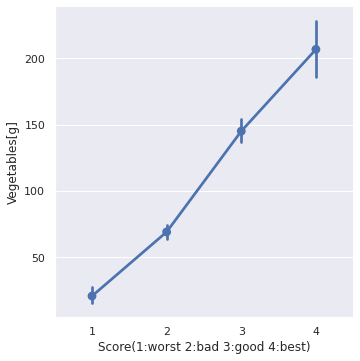

In [ ]:
# Google Spreadsheet からのデータの読み込み
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=k9q0pp33dckN

from google.colab import auth
from google.auth import default
import gspread
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open_by_key('個人のスプレッドシートのキー番号').sheet1
import pandas as pd

rows = worksheet.get_all_values()
header = rows.pop(0)
df = pd.DataFrame.from_records(rows, columns=header)#indexの''は自由に変更

# 空文字を None に変換しておく
df = df.where(df != '')
df = df.fillna(0)

sns.set(font='IPAexGothic')


df = df.drop(['','gender','Type'],axis=1)

sns.catplot(data=df, kind='point', x=df["Score(1:worst 2:bad 3:good 4:best)"].astype(int), y=df["Vegetables[g]"].astype(float))

plt.tight_layout()
plt.show()


#可視化でわかったこと
##・野菜(vegetable)は摂取するほどスコアが高い。
##・皿(number od dish)は多いほどスコアが高い。
##・塩分(salt)は男性が8g,女性が7g以下の摂取が推奨されているのに対して、塩分を摂取するほどスコアが高い。

#2-1　評価指標

###本データセットは、4つ(1~4)のクラスに分けられているので、非線形分類が適している。今回は、複数の決定木を用いた評価に適している「**RFC**」を使って評価を行い、正答・不正答した問題の分析を行う。  
使用する特徴量の詳細は詳細はPDFファイルを見てください。




#2-2
##評価結果と正解・不正解の可視化(RFC)

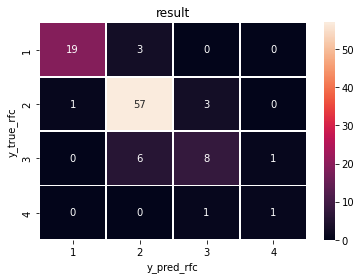

目的関数 1315 件
2    757
1    320
3    201
4     37
Name: Score(1:worst 2:bad 3:good 4:best), dtype: int64
テストの目的関数 100 件
2    61
1    22
3    15
4     2
Name: Score(1:worst 2:bad 3:good 4:best), dtype: int64
train score :  0.9958847736625515
test score :  0.85
100 問中 85 問正解
     Type gender  活動エネルギー  EER-E*3  P_target-P*3  C_target-C*3  dish_result  \
206     1      0      0.0      125          14.7          66.2            6   
821     1      1      0.0      -61          26.5          16.3            6   
499     0      0      2.0      904          38.8          91.2            9   
45      0      0      2.0     1487          67.4         285.5            9   
964     0      1      0.0     1430          49.0         228.1            6   
1022    0      1      0.0     2022          81.1         277.1            3   
852     2      1      0.0      587         -36.2         238.3           12   
410     1      1      0.0      543           7.9         225.1            3   
740     0      1 

In [ ]:
# Google Spreadsheet からのデータの読み込み
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=k9q0pp33dckN

from google.colab import auth
from google.auth import default
import gspread
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open_by_key('個人のスプレッドシートのキー番号').sheet1
import pandas as pd

rows = worksheet.get_all_values()
header = rows.pop(0)
df = pd.DataFrame.from_records(rows, columns=header)#indexの''は自由に変更

# 空文字を None に変換しておく
df = df.where(df != '')
df = df.fillna(0)

#特徴量

df.loc[df["Type"] == "breakfast","Type"] = 0
df.loc[df["Type"] == "lunch","Type"] = 1
df.loc[df["Type"] == "dinner","Type"] = 2

df.loc[df["gender"] == "female","gender"] = 0
df.loc[df["gender"] == "male","gender"] = 1

#基礎代謝量と活動エネルギーを求める
df.loc[df["gender"] == 0,"num"] = 0.5473 * 2.0
df.loc[df["gender"] == 1,"num"] = 0.5473

taisya = ((0.1238+(0.0481* df["weight"].astype(float))+(0.0234 * df["height"].astype(float))-(0.0138 * df["age"].astype(float))-df["num"].astype(float)*1))*1000/4.186 #基礎代謝量
Energy = round(df["EER[kcal]"].astype(float)/taisya,1)
df.loc[Energy < 1.6,"活動エネルギー"] = 0
df.loc[Energy.between(1.6,1.8),"活動エネルギー"] = 1
df.loc[Energy >= 1.9,"活動エネルギー"] = 2

#EER-E*3
df["EER-E*3"] = df["EER[kcal]"].astype(int)-(df["E[kcal]"].astype(int)*3)

#P_target-P*3
df["P_target-P*3"] = df["P target(15%)[g]"].astype(int)-(df["P[g]"].astype(float)*3.0)

#C_target-C*3
df["C_target-C*3"] = df["C target(60%)[g]"].astype(int)-(df["C[g]"].astype(float)*3.0)

#dish
df["dish_result"] = df["number of dishes"].astype(int) * 3

#vegetable
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

vegetables = df["Vegetables[g]"].astype(float) * 3
df["vegetables_3"] = vegetables

veg_label = vegetables >= 350
label_encoder_veg = enc.fit(veg_label)#T,Fを1,0に変換
int_veg = label_encoder_veg.transform(veg_label)
df["Vegetable_result"] = int_veg

#Salt
salt = df["Salt[g]"].astype(float) * 3.0
df["salt_3"] = salt

df.loc[(df["gender"]==0) & (df["salt_3"] <= 7.0),"Salt_result"] = 1
df.loc[(df["gender"]==0) & (df["salt_3"] > 7.0),"Salt_result"] = 0

df.loc[(df["gender"]==1) & (df["salt_3"] <= 8.0),"Salt_result"] = 1
df.loc[(df["gender"]==1) & (df["salt_3"] > 8.0),"Salt_result"] = 0

y = df["Score(1:worst 2:bad 3:good 4:best)"]#目的関数
x = df.drop(['','Score(1:worst 2:bad 3:good 4:best)','num','age','height','weight','EER[kcal]','P target(15%)[g]','F target(25%)[g]','C target(60%)[g]','number of dishes','E[kcal]','P[g]','F[g]','C[g]','Salt[g]','Vegetables[g]'],axis = 1)#説明関数、いらない特徴量を消す
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(x,y,test_size = 100)#test_sizeは変更

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
y_pred_rfc = RFC.predict(x_test)
y_true_rfc = y_test

tx = [x for x in range(1,5)]
ty = [y for y in range(1,5)]

cm_rfc = confusion_matrix(y_true_rfc, y_pred_rfc)
sns.heatmap(cm_rfc,xticklabels=tx, yticklabels=ty,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result")
plt.xlabel("y_pred_rfc")
plt.ylabel("y_true_rfc")
plt.show()

print('目的関数',len(df),'件')
print(df["Score(1:worst 2:bad 3:good 4:best)"].value_counts())

print('テストの目的関数',len(y_test),'件')
print(y_test.value_counts())

print('train score : ', RFC.score(x_train, y_train))
print('test score : ', RFC.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test)* RFC.score(x_test, y_test)),'問正解')

x_test["y_pred"] = y_pred_rfc#新しいDataframe
x_test["y_test"] = y_true_rfc#新しいDataframe

x_test.loc[x_test["y_pred"] == x_test["y_test"],"result"] = ''
x_test.loc[x_test["y_pred"] != x_test["y_test"],"result"] = '×'


print(x_test[0:10])
print("-------------------------------------------------------------------------------------------")
print(x_test[10:20])
print("-------------------------------------------------------------------------------------------")
print(x_test[20:30])
print("-------------------------------------------------------------------------------------------")
print(x_test[30:40])
print("-------------------------------------------------------------------------------------------")
print(x_test[40:50])
print("-------------------------------------------------------------------------------------------")
print(x_test[50:60])
print("-------------------------------------------------------------------------------------------")
print(x_test[60:70])
print("-------------------------------------------------------------------------------------------")
print(x_test[70:80])
print("-------------------------------------------------------------------------------------------")
print(x_test[80:90])
print("-------------------------------------------------------------------------------------------")
print(x_test[90:100])


#正解と不正解(RFC)  
###予測スコア = 1
index |Type| gender |活動エネルギー |EER-E*3| P_target-P*3　|C_target-C*3 | dish_result | vegetables_3 | Vegetable_result | salt_3 | Salt_result | y_pred | y_test | result
--- | --- | --- | --- | --- | --- | --- | --- |  --- |--- | --- | --- |  --- |--- | --- |
510 |  0 |  1  |  0.0  |   546  |    44.6   |   52.1   |  6 |0.0 |  0  |   2.1  |        1.0   |   1   |   2   |   × 
925 |  0  |    0  |    0.0   |   942   |  40.0  |  116.9  |  6 |0.0| 0 |3.0  | 1.0 |  1   |  1 |○
324  |   1   |   1   |   0.0  |   1224   |       48.4 |        158.0  |          3   |0.0     |            0   |  4.8    |      1.0  |    1 |     1     |○
575  |   0   |   0  |    1.0  |   1356   |       57.0  |       180.6   |         6 | 114.0   |              0  |   4.2    |      1.0   |   1   |   1   |○        
  
###予測スコア = 2
index |Type| gender |活動エネルギー |EER-E*3| P_target-P*3　|C_target-C*3 | dish_result | vegetables_3 | Vegetable_result | salt_3 | Salt_result | y_pred | y_test | result
--- | --- | --- | --- | --- | --- | --- | --- |  --- |--- | --- | --- |  --- |--- | --- |
45  |    0 |     0  |    2.0 |    1487  |    67.4   |   285.5  |  9|174.0   |     0  |   4.8  |        1.0  |    2  |    3  |  ×
31   |   0  |    0  |    2.0  |    903    |      60.8   | 226.9 |  12 |663.0   | 1  |  10.5  | 0.0  |   2  |   3 |     ×
882  |   1  |    1  |    0.0 |     270  |  -5.6  |  133.3  |   12 |186.0  | 0 |   8.4  |  0.0 |  2  |  3  |    × 
165   |  2  |    1  |    0.0 |   -1048  |  -82.7 |  85.3| 15|309.0   |  0|    12.3  |  0.0  |  2  |  3 |   ×
364  |   2  |    0  |    1.0 |   591 |  24.0 |  158.9  |  9|798.0   |  1 |10.2  | 0.0 | 2 |  3 |  ×
310  |  0  |    0 |     1.0 |     816 |  36.6 |  121.1 | 15 |192.0  | 0 | 6.0  |  1.0 |  2 |  3 | ×
913  |  2   |   1  |    0.0 |    1514 | 11.8 | 298.0  | 3 |24.0  | 0 | 8.7 |  0.0 |  2 |  1  |  × 
293  |   2 |     0 |     2.0  |   1651     |     43.6   |    272.1   |       3   |219.0 |  0  |   5.4  |   1.0 |     2  |    1  |    ×
205 |0 | 0 | 1.0  | 221 |  20.9 | 25.2 |   6 |0.0   | 0| 6.6|  1.0 | 2| 1 | × 
1284 |   2  |    1 |     1.0 |    1082 |         49.6 |         87.9|   9 |273.0  |               0  |  14.7  |        0.0  |    2  |    2      |  ○
462  |   1  |    0 |     2.0 |     -50  |       -28.7  |       -29.7  |          6|33.0   |              0 |   11.4 |         0.0 |     2 |     2        |○

###予測スコア = 3
index |Type| gender |活動エネルギー |EER-E*3| P_target-P*3　|C_target-C*3 | dish_result | vegetables_3 | Vegetable_result | salt_3 | Salt_result | y_pred | y_test | result
--- | --- | --- | --- | --- | --- | --- | --- |  --- |--- | --- | --- |  --- |--- | --- |
1307  |  1   |   1    |  0.0   |  -529   | 9.1 | -42.5 | 3 |405.0   | 1 |  6.6  |  1.0   |   3    |  2   |   ×
539  |   0   |   1   |   1.0  |   -374  | -2.9   |  82.3  | 12| 594.0    |  1 |  13.8   |  0.0   |   3    |  2   |   ×
1094  |  2   |   0  |    0.0   |  -471   |  10.8   |  44.8  | 9|609.0   |  1  |   5.7  |  1.0 |   3   |   2   |   ×  
101  |   2  |    1  |    0.0  |    147     |    -38.9     |     96.5  |         18|435.0       |          1 |   15.0   |       0.0  |    3     | 4  |    × 
29   |    2  |     0  |     1.0  |    -592    |        7.1  |        -52.5   |          3 |405.0   |  1 |     6.6 |  1.0 |      3  |     3  |       ○
724   |   1   |    0    |   1.0    |  -459   |    14.1   |     11.4    |        12|807.0    |   1  |   12.9   |        0.0     |  3      | 3      |○

###予測スコア = 4
index |Type| gender |活動エネルギー |EER-E*3| P_target-P*3　|C_target-C*3 | dish_result | vegetables_3 | Vegetable_result | salt_3 | Salt_result | y_pred | y_test | result
--- | --- | --- | --- | --- | --- | --- | --- |  --- |--- | --- | --- |  --- |--- | --- |
753  |   0 |    0   |   2.0 |     406    |      -2.3  |        62.1   |         6 |702.0    |             1 |   16.2    |      0.0  |    4    |  3    |  × 
715  |   2   |   0   |   1.0   |   467  |        20.5   |       42.3    |        9   | 714.0   |              1  |   7.8  |        0.0|      4 |     4 |○        

　  

#考えたこと①  

 index |Type| gender |活動エネルギー |EER-E*3| P_target-P*3|C_target-C*3 | dish_result | vegetables_3 | Vegetable_result | salt_3 | Salt_result | y_pred | y_test | result
--- | --- | --- | --- | --- | --- | --- | --- |  --- |--- | --- | --- |  --- |--- | --- |
31   |   0  |    0  |    2.0  |    903    |      60.8   | 226.9 |  12 |663.0   | 1  |  10.5  | 0.0  |   2  |   3 |     ×
364  |   2  |    0  |    1.0 |   591 |  24.0 |  158.9  |  9|798.0   |  1 |10.2  | 0.0 | 2 |  3 |  ×


・例えば、上記のような表において、vegetableとsaltに注目する。vegetable_3,Salt_3は、vegetableとsaltを3倍(3食分)した値であるので、本来の値(3で割った)は以下の表である。

index |vegetables|salt|y_pred | y_test|result
--- | --- | --- |--- |--- |--- |
31|221|3.5| 2 |  3 |×
364|266|3.4| 2 |  3 |×

これらの値を1-1の特徴量の可視化で確認(vegetableととsaltのグラフ)してみると、スコア2,3,4のデータが密集している個所であった。明確な基準が分からなかったため、モデルが正答できなかったと思う。  
　  

#考えたこと②

 index |Type| gender |活動エネルギー |EER-E*3| P_target-P*3|C_target-C*3 | dish_result | vegetables_3 | Vegetable_result | salt_3 | Salt_result | y_pred | y_test | result
--- | --- | --- | --- | --- | --- | --- | --- |  --- |--- | --- | --- |  --- |--- | --- |
462  |   1  |    0 |     2.0 |     -50  |       -28.7  |       -29.7  |          6|33.0   |              0 |   11.4 |         0.0 |     2 |     2        |○
575  |   0   |   0  |    1.0  |   1356   |       57.0  |       180.6   |         6 | 114.0   |              0  |   4.2    |      1.0   |   1   |   1   |○

　  
・①と同様に、正解したデータも同じように表にしてみる。

index |vegetables|salt|y_pred | y_test|result
--- | --- | --- |--- |--- |--- |
462|11|3.8|2   |   2|○
575|38|1.4|1   |   1|○

これらの値を1-1の特徴量の可視化で確認してみると、他のスコアは密集していなかった。判別しやすかったため。正解したのだと思う。